In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import os
from PIL import Image as im
import napari as nap
import PyQt5

In [2]:
# Grab all frames from video
deconstack_path = r'./deconstack/deconstack.avi'

In [3]:
! ffmpeg -r 1 -i './deconstack/deconstack.avi' -r 1 "./deconstack/$filename%03d.bmp"

ffmpeg version 5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with clang version 14.0.6
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1674566267822/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1674566267822/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --enable-libx264 --enable

In [4]:
! ffmpeg -r 1 -i './subMIN_20231214_08_89plus04-HALVED_DEconStacks/subMIN_20231214_08_89plus04-HALVED_DEconStacks.avi' -r 1 "./subMIN_20231214_08_89plus04-HALVED_DEconStacks/$filename%03d.bmp"

ffmpeg version 5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with clang version 14.0.6
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1674566267822/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1674566267822/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --enable-libx264 --enable

In [5]:
# Grab all BMP files and turn them into a numpy array
bmp_files = [f for f in os.listdir('./deconstack') if f.endswith('.bmp')]

deconstack_bits = []
for files in bmp_files:
    img = im.open('./deconstack/' + files)
    deconstack_bits.append(np.array(img))

In [6]:
# transform all frames into a tuple of (frame, x, y)
deconstack_bits_3d = np.array(deconstack_bits)
print(deconstack_bits_3d.shape)

(21, 729, 727)


In [7]:
#nap.view_image(deconstack_bits_3d, name='deconstack', colormap='magma', blending='additive', ndisplay=3, scale=[10, 1, 1])

In [10]:
# Grab all BMP files and turn them into a numpy array
bmp_files = [f for f in os.listdir('./subMIN_20231214_08_89plus04-HALVED_DEconStacks') if f.endswith('.bmp')]

theotherone_bits = []
for files in bmp_files:
    img = im.open('./subMIN_20231214_08_89plus04-HALVED_DEconStacks/' + files)
    theotherone_bits.append(np.array(img))

In [11]:
therotherone_bits_3d = np.array(theotherone_bits)
print(therotherone_bits_3d.shape)
#nap.view_image(therotherone_bits_3d, name='theotherone', colormap='magma', blending='additive', scale=[10, 1, 1], ndisplay=3)

(21, 729, 727)


In [12]:
timething = np.array([deconstack_bits_3d, therotherone_bits_3d])
nap.view_image(timething, name='timething', colormap='magma', blending='additive', scale=[1, 10, 1, 1], ndisplay=3)

Viewer(camera=Camera(center=(100.0, 364.0, 363.0), zoom=0.724554183813443, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(0.0, 100.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=3, last_used=0, range=((0.0, 2.0, 1.0), (0.0, 210.0, 10.0), (0.0, 729.0, 1.0), (0.0, 727.0, 1.0)), current_step=(0, 10, 364, 363), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'timething' at 0x16dc43cd0>], help='use <2> for transform', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x16dae7a60>], _persisted_mouse_event={}, _mouse_drag_gen={}, _mouse_wheel_gen={}, keymap={})

# Get the bread using GPU

PyTorch GPU acceleration using Metal Performance Shader (MPS) for macOS.
CUDA for others.

## Richardson-Lucy Deconvolution

$\ e_{k+1} = e_{k} \{[ \frac{i}{e_{k} * f}] * b\} $

## Time for big dubs

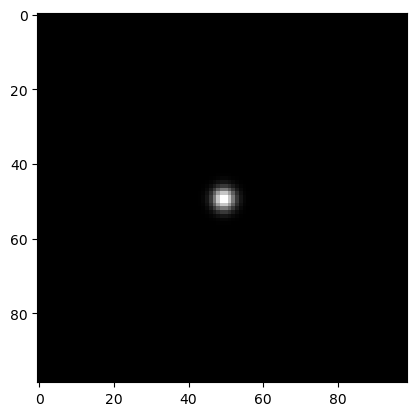

In [192]:
# Define backward projection function
# Guess i'll just make a dummy PSF for now

# Define forward projection function
x_len = 99

# Generate gaussian PSF
x,y = np.meshgrid(np.arange(-x_len/2, x_len/2), np.arange(-x_len/2, x_len/2))

d = np.sqrt(x*x + y*y)

sigma, mu = 2.0, 0.0

dummy_psf_xy = 256*np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) ) # forward projection
dummy_psf_xy = torch.tensor(dummy_psf_xy).unsqueeze(0).unsqueeze(0).float().to('mps')
dummy_psf_weights = torch.nn.Parameter(dummy_psf_xy, requires_grad=True)

plt.imshow(dummy_psf_xy[0][0][:][:].cpu().detach().numpy(), cmap='gray')

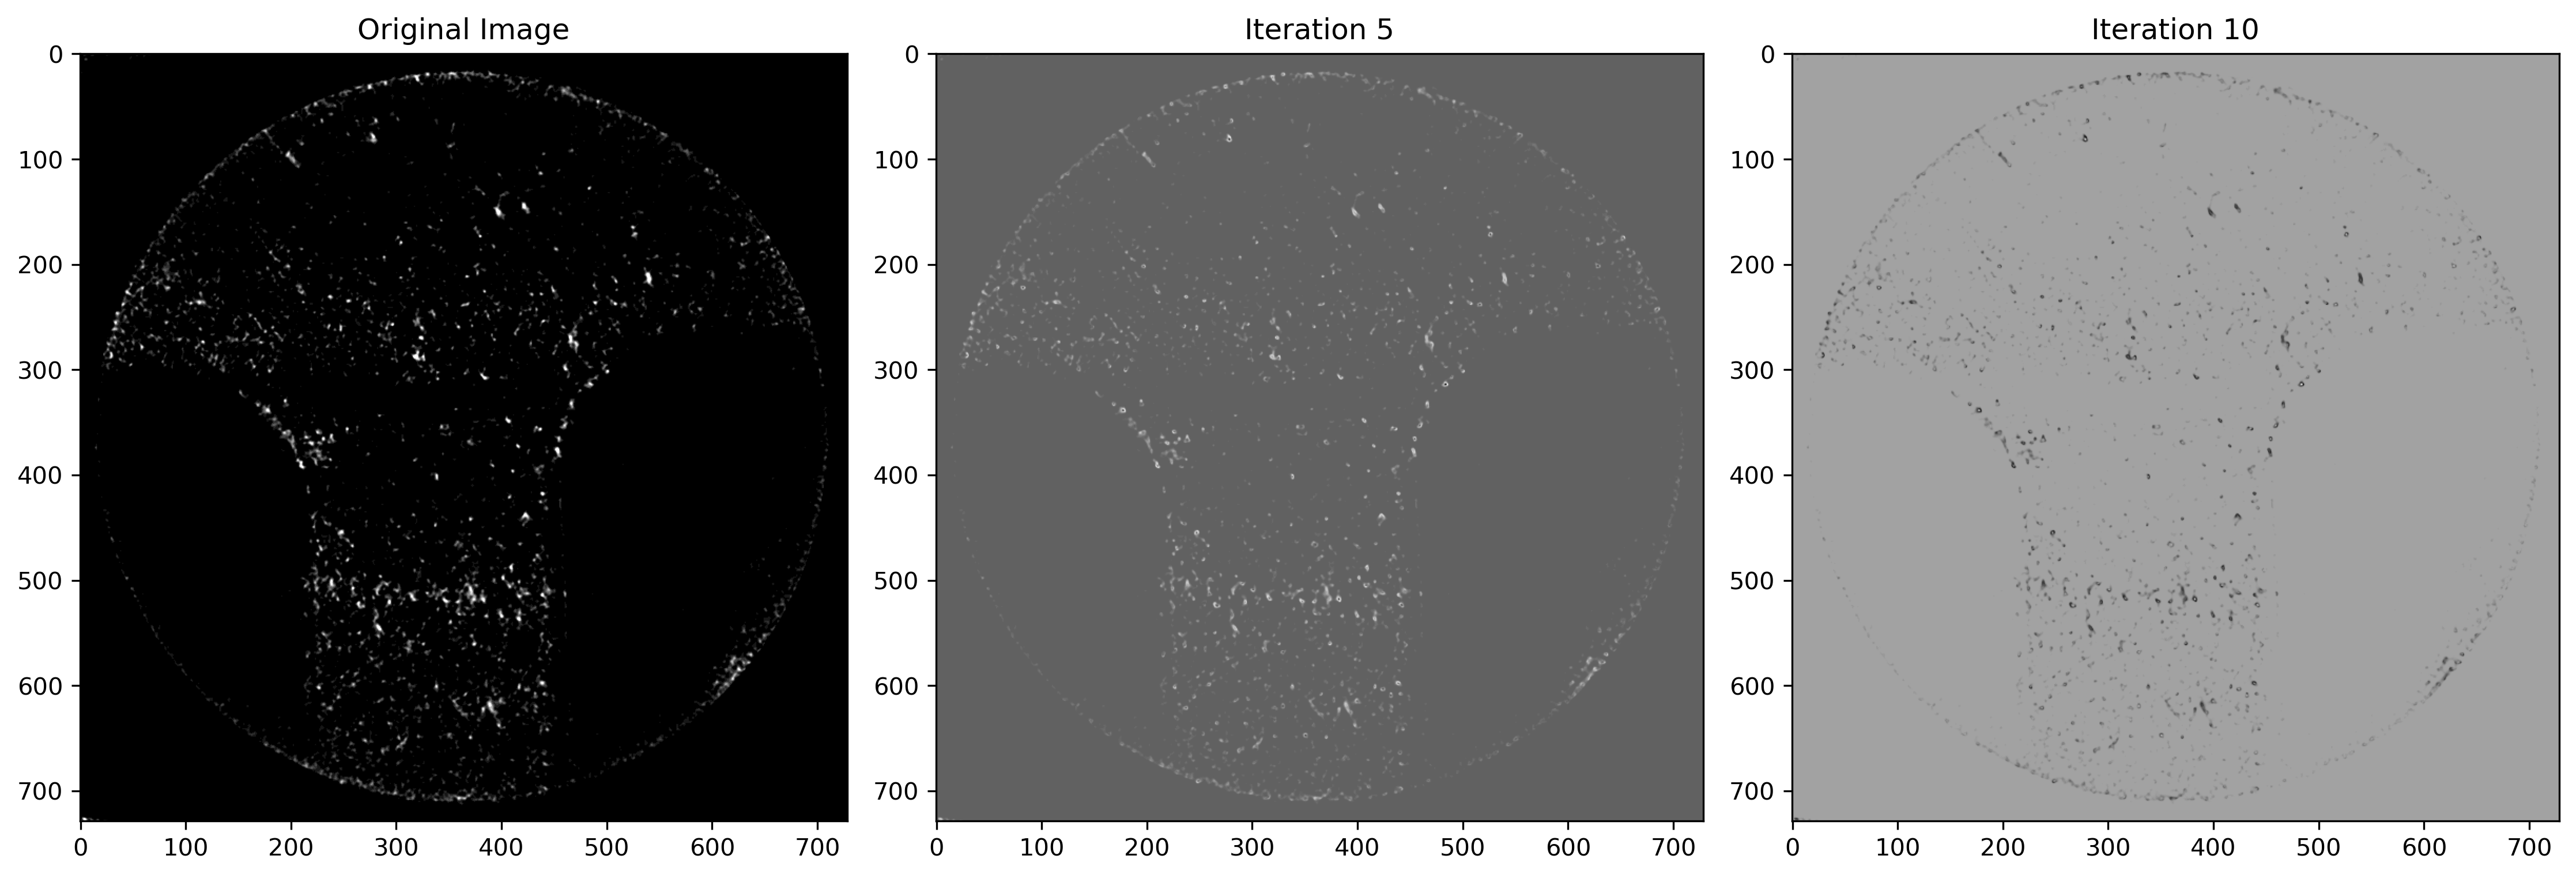

In [193]:
# Try with "traditional" method first
dummy_traditional_b = torch.transpose(dummy_psf_weights, 2, 3).to('mps')
dummy_traditional_b = torch.nn.Parameter(dummy_traditional_b, requires_grad=True)

n = 10
e_i = therotherone_bits_3d[9]

# Make image square
square = np.zeros((729, 729))
square[:e_i.shape[0], :e_i.shape[1]] = e_i
e_i = square

# Convert to tensor
e_i = torch.from_numpy(e_i).float()
e_i = e_i.unsqueeze(0).unsqueeze(0).to('mps') # Add batch and channel dimensions, send to mps
dummy_image = e_i # Does not change with iteration

# Show eveolution over time
fig_example = plt.figure(figsize=(15, 5), dpi=300)
ax0, ax1, ax2 = fig_example.subplots(1, 3)
ax0.imshow(e_i[0][0][:][:].cpu().detach().numpy(), cmap='gray')
ax0.set_title('Original Image')

def richardson_lucy(e_i, oringinal_image, f, b):
    
    pad = (f[0][0].shape[0] - 1)/2
    pad = int(pad)
    
    kernel_size = f.shape[0]
    func1 = torch.nn.Conv2d(1, 1, kernel_size=kernel_size, stride=1, padding = pad, device = 'mps')
    func1.weight = f
    denom = func1(e_i)
    
    kernel_size = b.shape[0]
    func2 = torch.nn.Conv2d(1, 1, kernel_size=kernel_size, stride=1, padding = pad, device = 'mps')
    func2.weight = b
    factor = func2(oringinal_image/denom)
    
    return e_i * factor

for i in range(n):
    e_i = richardson_lucy(e_i, dummy_image, dummy_psf_weights, dummy_traditional_b)
    
    if i == 5:
        ax1.imshow(e_i[0][0][:][:].cpu().detach().numpy(), cmap='gray')
        ax1.set_title('Iteration 5')
    
ax2.imshow(e_i[0][0][:][:].cpu().detach().numpy(), cmap='gray')
ax2.set_title('Iteration 10')
fig_example.set_tight_layout(True)

In [194]:
# Process everything with the RL algorithm
n = 10
e_i = therotherone_bits_3d
N, w, h = e_i.shape[0], e_i.shape[1], e_i.shape[2]
w_max = np.max([w, h])

# Make image square
square = np.zeros((N, w_max, w_max))
square[:,:e_i.shape[1], :e_i.shape[2]] = e_i
e_i = square
print(e_i.shape)

# Convert to tensor
e_i = torch.from_numpy(e_i).float()
e_i = e_i.unsqueeze(1).to('mps') # Add batch and channel dimensions, send to mps
dummy_image = e_i # Does not change with iteration


(21, 729, 729)


In [197]:
# Make directory to save images
if not os.path.exists('./RL_iterations'):
    os.makedirs('./RL_iterations')
    
# Parallel RL
PRL_richardson_lucy = torch.nn.DataParallel(richardson_lucy)

for i in range(n):
    e_i = PRL_richardson_lucy(e_i, dummy_image, dummy_psf_weights, dummy_traditional_b)
    for N in range(e_i.shape[0]):
        image = im.fromarray(e_i[N][0][:][:].cpu().detach().numpy())
        image = image.convert('L')
        image.save('./RL_iterations/RL_iteration_' + str(i) + '_image_' + str(N) + '.bmp')

# Seeing if the RL algorithm actually works well

In [251]:
# Make new layer for the last iteration
data_length_half = round(len(e_i[:][:][:][:].cpu().detach().squeeze(1).numpy())/2)
first_half = e_i[:data_length_half][:][:][:].cpu().detach().squeeze(1).numpy()
second_half = e_i[data_length_half+1:][:][:][:].cpu().detach().squeeze(1).numpy()
time_series = np.array([first_half, second_half])
nap.view_image(time_series, name='RL-Deconv', colormap='magma', blending='additive', scale=[1, 10, 1, 1], ndisplay=3)

Viewer(camera=Camera(center=(45.0, 364.0, 364.0), zoom=0.724554183813443, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(0.0, 40.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=3, last_used=0, range=((0.0, 2.0, 1.0), (0.0, 100.0, 10.0), (0.0, 729.0, 1.0), (0.0, 729.0, 1.0)), current_step=(0, 4, 364, 364), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'RL-Deconv' at 0x2f09f2750>], help='use <2> for transform', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x16dae7a60>], _persisted_mouse_event={}, _mouse_drag_gen={}, _mouse_wheel_gen={}, keymap={})

: 